In [105]:
import pandas as pd
import scanpy as sc 
import numpy as np
import matplotlib as plt
import anndata as ad
plt.rcParams["figure.figsize"] = (20,14)

ModuleNotFoundError: No module named 'AnnData'

In [68]:
adata = sc.read('/mnt/data/yob/hackathon/subcellular_expression/data/adata.h5ad')

In [106]:
type(adata)

anndata._core.anndata.AnnData

In [79]:
pd.DataFrame(adata.X).T.mean()

0        -0.210229
1        -0.066862
2        -0.289834
3        -0.123196
4        -0.078616
            ...   
541044   -0.154150
541045   -0.107725
541046   -0.106050
541047   -0.087248
541048   -0.090316
Length: 541049, dtype: float32

/mnt/data/miniconda3/envs/pytorch_cey/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


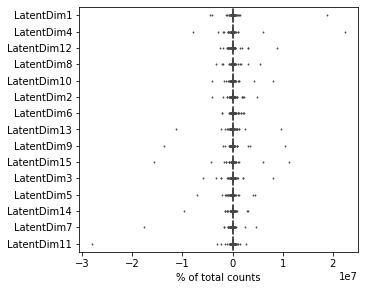

In [65]:
sc.pl.highest_expr_genes(adata, n_top=15, )

In [80]:
sc.tl.pca(adata, svd_solver='arpack')

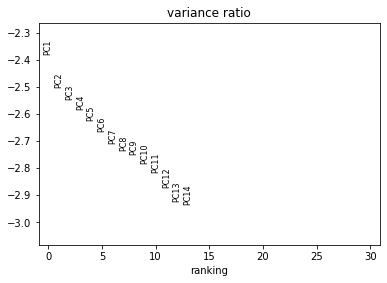

In [81]:
sc.pl.pca_variance_ratio(adata, log=True)

In [82]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

/mnt/data/miniconda3/envs/pytorch_cey/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [84]:
sc.tl.umap(adata)

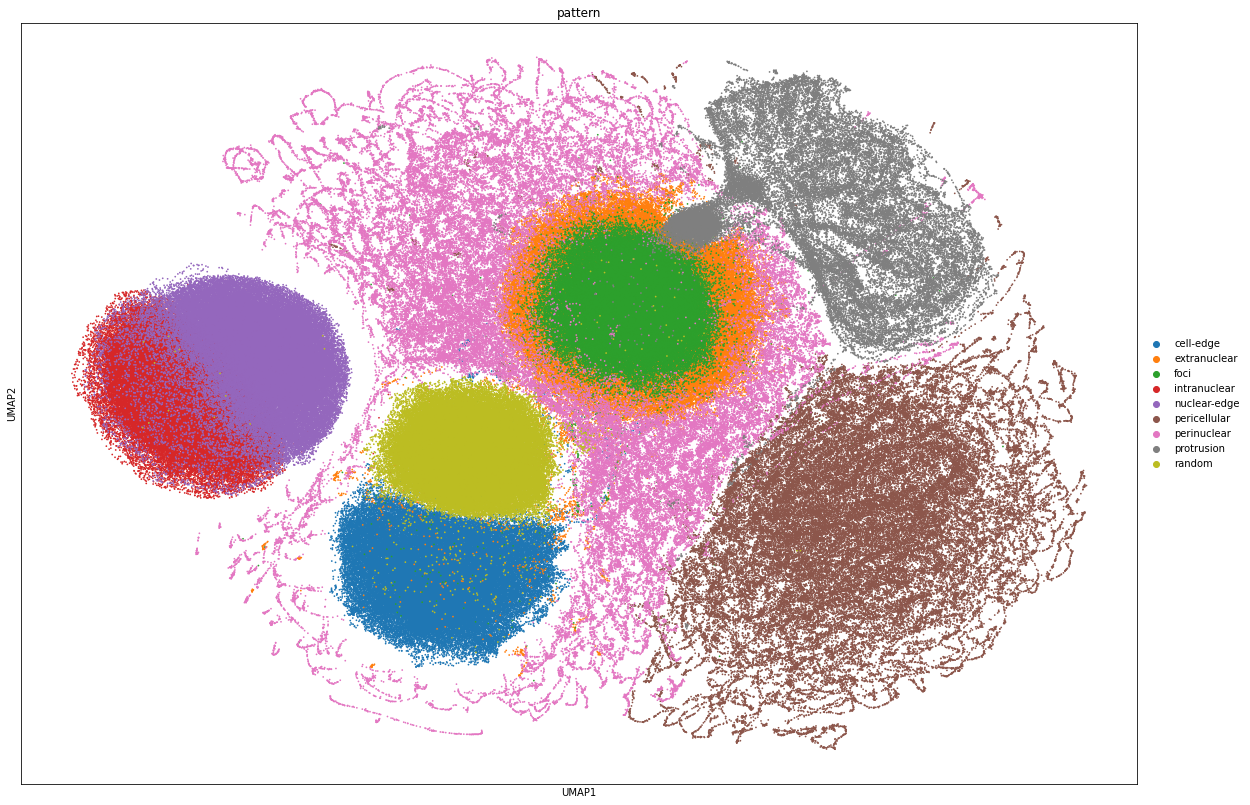

In [115]:
sc.pl.umap(adata,color='pattern',size=12,)

In [95]:
for clust in adata.obs['pattern'].cat.categories:
    print(clust)

cell-edge
extranuclear
foci
intranuclear
nuclear-edge
pericellular
perinuclear
protrusion
random


In [112]:
def subsample(adata:ad.AnnData, cluster_key:str, target_cells:float=2500):
    adatas = [adata[adata.obs[cluster_key].isin([clust])] for clust in adata.obs[cluster_key].cat.categories]
    for dat in adatas:
        if dat.n_obs > target_cells:
            sc.pp.subsample(dat, n_obs=target_cells, random_state=0)

    adata_downsampled = adatas[0].concatenate(*adatas[1:])
    return adata_downsampled

In [120]:
adata_subsampled = subsample(adata,cluster_key='pattern',target_cells=5000)

/mnt/data/miniconda3/envs/pytorch_cey/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [121]:
adata_subsampled

AnnData object with n_obs × n_vars = 45000 × 15
    obs: 'pattern', 'cell_id', 'train_or_val', 'rotation', 'rotation_interval', 'original_image_paths', 'batch'
    obsm: 'X_pca', 'X_umap'

In [122]:
sc.tl.pca(adata_subsampled, svd_solver='arpack')
sc.pp.neighbors(adata_subsampled, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_subsampled)

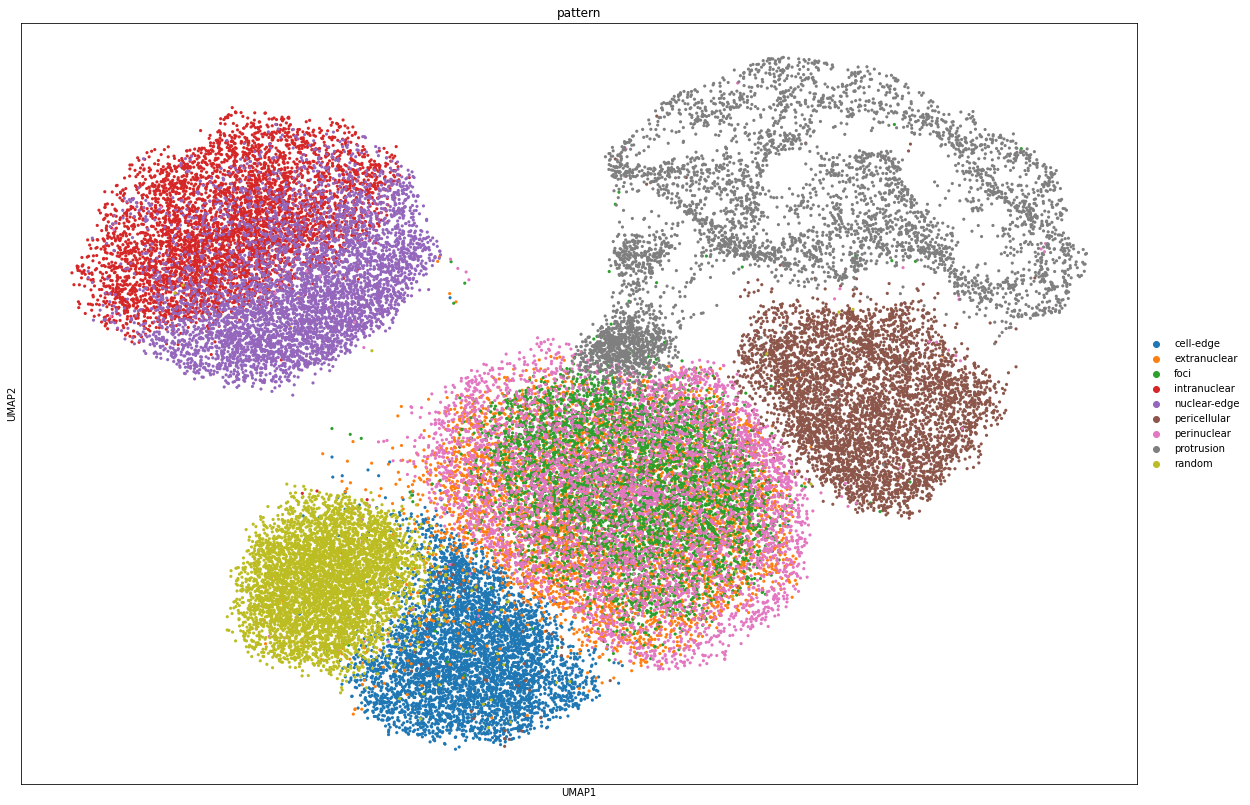

In [123]:
sc.pl.umap(adata_subsampled,color='pattern',size=40,)